<a href="https://colab.research.google.com/github/QuinnGrace/StatML4PopHealth/blob/changes/practicals/day1/practical1/2_wind_data_modelling_no_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/resources/logos/imperial.png" width="250" vspace="8"/>
<img src="https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/resources/logos/mlgh.png" width="220" hspace="50" vspace="5"/>
<img src="https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/resources/logos/ammi.png" width="190"/>

<font size="6">Modern Statistics and Machine Learning<br> for Population Health in Africa </font>

<font size="4">24th - 28th March 2025</font>

</center>

# Computing lab: Bayesian normal fixed effects regression models
## Tristan Naidoo and Sahoko Ishida

In this notebook, we will fit a Bayesian normal linear regression model to the windspeed data processed in the notebook `wind_data_cleaning.ipynb`, using the probabilistic computing language Stan.

### 1. Installing cmdstanpy and loading necessary packages

In [1]:
!curl -O "https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/resources/scripts/utilities.py"

from utilities import custom_install_cmdstan, test_cmdstan_installation

custom_install_cmdstan()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2066  100  2066    0     0   8223      0 --:--:-- --:--:-- --:--:--  8231
Installing cmdstanpy==1.2.5
Unpacking colab-cmdstan-2.36.0.tar.gz
Installing required libtbb2 Linux package
Setting cmdstan path
CmdStan successfully installed!


In [2]:
import logging
logging.getLogger("cmdstanpy").setLevel(logging.INFO)

# Test the cmdstan installation
test_cmdstan_installation()

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/cmdstan-2.36.0/examples/bernoulli/bernoulli info
cwd: None
09:08:31 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


data {
  int<lower=0> N;
  array[N] int<lower=0, upper=1> y;
}
parameters {
  real<lower=0, upper=1> theta;
}
model {
  theta ~ beta(1, 1); // uniform prior on interval 0,1
  y ~ bernoulli(theta);
}
{
    "N" : 10,
    "y" : [0,1,0,0,0,0,0,0,0,1]
}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/cmdstan-2.36.0/examples/bernoulli/bernoulli', 'id=1', 'random', 'seed=123', 'data', 'file=cmdstan-2.36.0/examples/bernoulli/bernoulli.data.json', 'output', 'file=/tmp/tmpmz00nx37/bernoullit0nq0t7v/bernoulli-20250325090831_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/cmdstan-2.36.0/examples/bernoulli/bernoulli', 'id=2', 'random', 'seed=123', 'data', 'file=cmdstan-2.36.0/examples/bernoulli/bernoulli.data.json', 'output', 'file=/tmp/tmpmz00nx37/bernoullit0nq0t7v/bernoulli-20250325090831_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/cmdstan-2.36.0/examples/bernoulli/bernoulli', 'id=3', 'random', 'seed=123', 'data', 'file=cmdst

09:08:31 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/cmdstan-2.36.0/examples/bernoulli/bernoulli', 'id=1', 'random', 'seed=123', 'data', 'file=cmdstan-2.36.0/examples/bernoulli/bernoulli.data.json', 'output', 'file=/tmp/tmpmz00nx37/bernoullit0nq0t7v/bernoulli-20250325090831_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmz00nx37/bernoullit0nq0t7v/bernoulli-20250325090831_1.csv
 console_msgs (if any):
	/tmp/tmpmz00nx37/bernoullit0nq0t7v/bernoulli-20250325090831_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      gamma = 0.05 (Default)
   

In [3]:
import os
import pickle
from pathlib import Path

import arviz as az
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd

import logging
logging.getLogger("cmdstanpy").setLevel(logging.INFO)

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Aesthetics
sns.set_theme(style="whitegrid")
font = {"family": "sans-serif",
        "weight": "normal",
		"size": 10.5}
mpl.rc('font', **font)

In [4]:
# get the input data
!curl -O "https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/day1/practical1/data/cleaned_wind_data_date_features.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.1M  100 30.1M    0     0  31.4M      0 --:--:-- --:--:-- --:--:-- 31.4M


In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Adjust this as required - this is where your output will be stored.
output_dir = Path(*["drive", "MyDrive", "StatML4PopHealth", "practical1"])
output_dir.mkdir(parents=True, exist_ok=True)

Mounted at /content/drive


### 2. Load and visualise data, study objectives

Wind speed is influenced by factors like temperature and location. As temperatures rise during the day, wind speeds tend to increase, creating a typical diurnal pattern with higher winds in the afternoon and lower winds at night. Seasonal patterns also emerge as changes in weather and atmospheric conditions vary throughout the year.

From the pre-processed dataset, we will take a look at hourly windspeed recordings at a selected site (`'Bothasig AQM Site'`), between 1st January, 2020 and 21st January 2020.

In [6]:
df = pd.read_csv("cleaned_wind_data_date_features.csv")
df.head()
df.timestamp =  pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S")
df.date =  pd.to_datetime(df["date"], format="%Y-%m-%d")

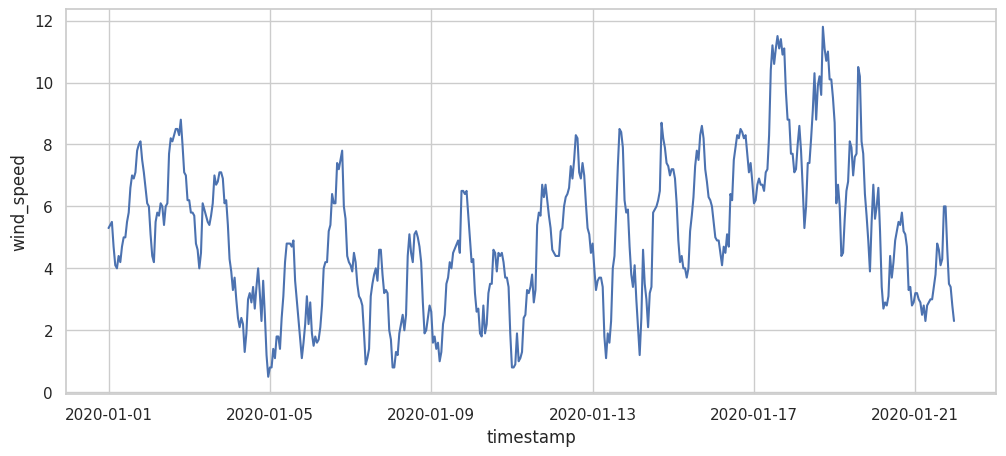

In [7]:
df_diurnal = df[(df["date"] >= "2020-01-01") & (df["date"] <="2020-01-21") &
 (df["location"]=="Bothasig AQM Site")]
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_diurnal, x="timestamp", y="wind_speed")
plt.show()

### Research questions

From the plot above, we can observe some discernible patterns, including a diurnal cycle and an overall trend over the study period. Our objectives are as follows:

1. Diurnal Cycle Analysis
  - What does the average diurnal cycle of wind speed look like?  
  - At what time does wind speed peak, and when does it reach its lowest point?  
  - Can we quantify the difference between the maximum and minimum wind speed within a day and estimate its credible interval?  

2. Overall Trend Analysis
  - The overall trend appears to be non-linear.  
  - Can we model this trend by incorporating polynomial terms?  
  - What is the most appropriate polynomial order for capturing this trend?  


## 3.Building a statistical model
To investigate these questions, we will stick with a Bayesian normal fixed effects regression model.

Let us denote by $y_i$ the log windspeed of the $i$th observation; by $X_{ij}$, $j=1,\dotsc,23$ binary indicators that evaluate to $1$ if the $i$th observation corresponds to the $j$th hour of the day; and by $X_{i25}$ the standardised `day` variable.  We will also include polynomial terms of this variable. We define our regression model as follows:

\begin{align*}
& y_i \sim \text{Normal}(\mu_i, \sigma^2) \\
& \mu_i = \beta_0 + \sum_{j=1}^{24}\beta_{j} X_{ij} + \sum_{p=1}^{P} \beta_{24+p} X_{i25}^{p} \\
& \beta_0 \sim \text{Normal}(0, 100) \\
& \beta_j \sim \text{Normal}(0, 1) \\
& \sigma \sim \text{Half-Cauchy}(0,1)
\end{align*}

Here, the $\beta$ terms are the unknown fixed effect regression coefficients, and $\sigma^2$ is the measurement noise.

We want to estimate the joint posterior density
\begin{align*}
p(\beta_0,\dotsc,\beta_{24+P},\sigma | y, X).
\end{align*}


#### 3.1 Consideration
* Covariates $X_1, \ldots, X_{24}$ (hour):
The original variable hour is categorical with 24 categories. A common practice is to select one category (e.g., hour 0) as the base and include the remaining 23 dummy variables in the model. However, in this analysis, we choose to include all 24 categories. This approach is motivated by our interest in capturing the average diurnal pattern, which can be visualized by plotting the coefficient estimates $\hat{\beta}{1}, \ldots, \hat{\beta}{24}$ along with their credible intervals. Omitting the base category would be inconvenient for this purpose. To ensure that these 24 parameters are identifiable, we impose the constraint that they sum to zero: $\sum_{j=1}^{24}\beta_j = 0$. This constraint guarantees identifiability while allowing us to interpret the average diurnal pattern directly from the coefficient estimates.
* Covariates $X_{25},\dots,X_{24+P}$ (day):
Let $D_i$ be the variable indicating the day on which the $i$-th observation is recorded, such that $D_i = 1$ if the observation was recorded on the first day of the study period, $D_i = 2$ if recorded on the second day, and so on. We standardise this variable by $X_{i25} = (D_i - m_i)/s_i$, where $m_i$ and $s_i$ are mean and the standard deviation of $D_i$.
* The target variable wind_speed: This variable takes positive values. In this analysis, we apply a simple log transformation. Alternatively, we could deviate from the normal model and use a probability distribution with support $(0, \infty)$, such as the Weibull distribution, which is a common choice for modeling wind speed.

#### 3.2 Prior specification

To specify the prior distributions, I worked out that the mean log windspeed is around $1.5$. So we expect the posterior $\beta_0$ to be around that value in the above model. For this reason, we chose a $\text{Normal}(0, 5^2)$ prior, which has 95% mass approximately in $[-10,10]$. With this choice, we expect that the marginal posterior density of $\beta_0$ will lie nicely within the prior density of $\beta_0$. Note that it would be poor practice to specify a prior that is much wider (such as $\text{Normal}(0, 100^2)$) as this may lead to poor sampling. It would also be poor practice to center the prior at $1.5$ (such as $\text{Normal}(1.5, 1^2)$) as this could make it difficult to apply the model to a slightly different data set.

For the binary variables and the standardised $X_{i25}$ and its polynomials, we can chose default $\text{Normal}(0, 1)$ priors. If $X_{i25}$ had not been standardised and be in nominal log year or year values, we would expect very small values of the posterior $\beta_{25}$, and a $\text{Normal}(0, 1)$ might be unsuitably vague. This should make clear to you that, typically, the default prior choices that are listed and investigated in textbooks or the `Stan` manual are suitable to data and covariates on standardised scales. Once the data are standardised, then there are standard Bayesian recipes that can be applied. Without standardisation, off-the-shelf recommendations are hard to make or may be poorly justified.

The measurement noise $\sigma$ is given a fairly heavy tailed $\text{Half-Cauchy}(0,1)$ prior density. Other good options might be an Exponential prior density, Half-normal prior, or Inverse-Gamma prior on $\sigma^2$; please see the `Stan` manual for further discussion.   


## 4 Numerical inference with Stan

### 4.1 Further data processing
* Filter the data based on study period and site(s) chosen. You can for example choose `"Bothasig AQM Site"`, `start_date = "2020-01-01"`, `end_date = "2020-01-22"`
* Log transform the windspeed. Make sure to remove the entries with NA values. Use `DataFrame.dropna()`
* Create dummy variables. You can use `pd.get_dummies()` with an option `drop_first = False`


In [56]:
df.date.max()

Timestamp('2020-12-31 00:00:00')

In [57]:
df_data = df[(df["date"] >= "2018-01-01") & (df["date"] <="2020-01-01") &
 (df["location"]=="Bothasig AQM Site")]

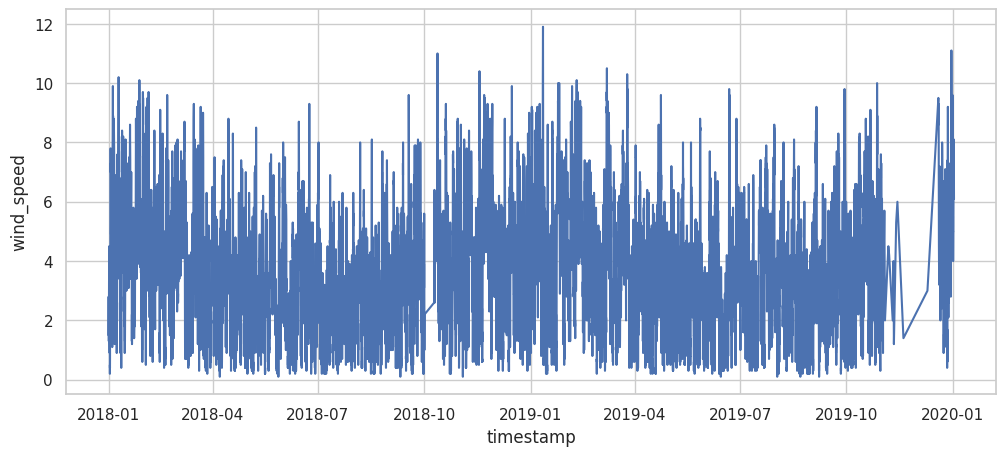

In [58]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_data, x="timestamp", y="wind_speed")
plt.show()

In [59]:
df_data.head()

,timestamp,location,wind_dir,wind_speed,date,hour,dow,dow_hour,month,year,month_year
192798,2018-01-01 00:00:00,Bothasig AQM Site,44.1,1.5,2018-01-01,0,1,1-00,1,2018,2018-01
192809,2018-01-01 01:00:00,Bothasig AQM Site,302.1,2.7,2018-01-01,1,1,1-01,1,2018,2018-01
192816,2018-01-01 02:00:00,Bothasig AQM Site,320.1,2.8,2018-01-01,2,1,1-02,1,2018,2018-01
192819,2018-01-01 03:00:00,Bothasig AQM Site,314.3,2.5,2018-01-01,3,1,1-03,1,2018,2018-01
192828,2018-01-01 04:00:00,Bothasig AQM Site,330.3,2.1,2018-01-01,4,1,1-04,1,2018,2018-01


In [60]:
df_data.shape

(17544, 11)

In [61]:
df_data['log_wind_speed'] = np.log(df_data['wind_speed'].values)

<ipython-input-61-ffbd3f23da10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['log_wind_speed'] = np.log(df_data['wind_speed'].values)


In [62]:
dummies = pd.get_dummies(df_data['hour'],drop_first=False,dtype='int')

In [63]:
df_data = pd.concat([df_data, dummies], axis=1)
df_data.head()

,timestamp,location,wind_dir,wind_speed,date,hour,dow,dow_hour,month,year,...,14,15,16,17,18,19,20,21,22,23
192798,2018-01-01 00:00:00,Bothasig AQM Site,44.1,1.5,2018-01-01,0,1,1-00,1,2018,...,0,0,0,0,0,0,0,0,0,0
192809,2018-01-01 01:00:00,Bothasig AQM Site,302.1,2.7,2018-01-01,1,1,1-01,1,2018,...,0,0,0,0,0,0,0,0,0,0
192816,2018-01-01 02:00:00,Bothasig AQM Site,320.1,2.8,2018-01-01,2,1,1-02,1,2018,...,0,0,0,0,0,0,0,0,0,0
192819,2018-01-01 03:00:00,Bothasig AQM Site,314.3,2.5,2018-01-01,3,1,1-03,1,2018,...,0,0,0,0,0,0,0,0,0,0
192828,2018-01-01 04:00:00,Bothasig AQM Site,330.3,2.1,2018-01-01,4,1,1-04,1,2018,...,0,0,0,0,0,0,0,0,0,0


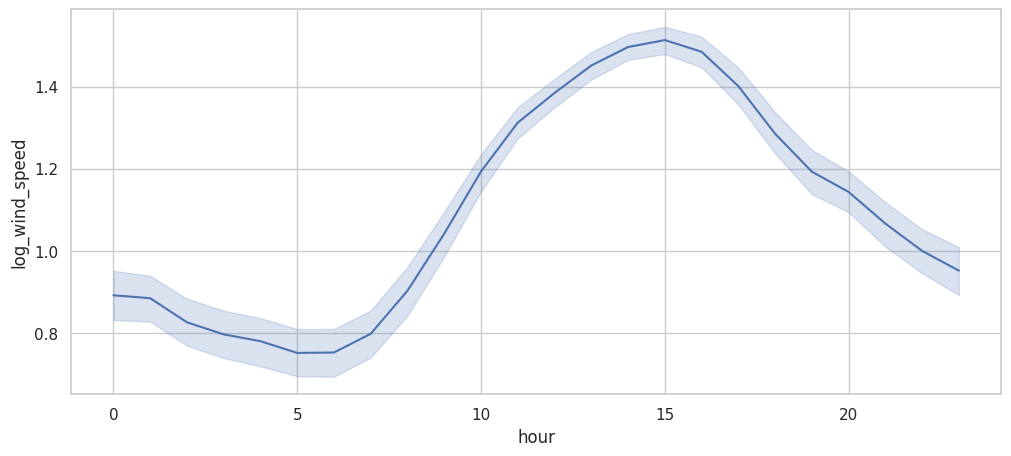

In [64]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_data, x="hour", y="log_wind_speed")
plt.show()

### 4.2 Stan code
Using the exmple code we looked at during the lecture, let's write stan code for the model in Section 3. Make sure to
- Standardise the day variable, $X_{25}$
- Incorporate a sum-to-zero constraint on $\beta_{1},\ldots,\beta_{24}$. There are multiple ways to do this, and one is to add `soft-sum-to-zero` constraint, as part of prior in the model block. Consider adding `sum(beta_hour) ~ normal( 0 , 0.001*24 )`, where `beta_hour` is a vector of length $24$. What does this mean? It tries to keep the sum as close to zero as possible.

Write a stan code

In [78]:
model1_text = """
functions {
    matrix poly_basis(vector u, int P) {
        int N = num_elements(u);
        matrix[N, P] U;
        for (n in 1:N) {
            for (p in 1:P) {
                U[n, p] = pow(u[n], p);
            }
        }
        return U;
    }
}
data{
    int<lower=1> N;
    int<lower=1> P;
    array [N] real y;
    matrix[N,24] X_hour;
    // vector[N] x_day;
}
transformed data{
    matrix[N,P] X_day ;
    {
      vector[N] xday_std = (x_day - mean(x_day)) / sd(x_day); // standardise
      X_day = poly_basis(xday_std,P);
    }
}
parameters{
    real<lower=0> sigma;
    real beta0;
    vector[24] beta_hour;
    // vector[P] beta_day;
}
transformed parameters{
    vector[N] mu;
    mu = beta0 + X_hour * beta_hour + X_day * beta_day;
}
model{
    sigma ~ cauchy( 0 , 1 );
    beta0 ~ normal( 0 , 5 );
    beta_hour ~ normal( 0 , 1 );
    sum(beta_hour) ~ normal( 0 , 0.001*24 ); // soft sum-to-zero constraint
    beta_day ~ normal( 0 , 1 );
    y ~ normal( mu , sigma );
}
generated quantities {
  vector[N] log_lik;
  array[N] real y_rep;

  for (i in 1:N) {
    log_lik[i] = normal_lpdf(y[i] | mu[i], sigma);
    y_rep[i] = normal_rng(mu[i], sigma);
  }
}
"""

Compile Stan model

In [79]:
# Write the Stan model to a file
# CmdStanPy requires the model to be written to a file
model1_filename = output_dir.joinpath("wind.stan")
with open(model1_filename, "w") as f:
    f.write(model1_text)

Create data dicitionary for Stan

In [75]:
df_data = df_data.drop(['timestamp',	'log_wind_speed','month_year', 'location',	'wind_dir','date',	'hour',	'dow',	'dow_hour',	'month',	'year'	],axis=1)

KeyError: "['timestamp', 'log_wind_speed', 'month_year', 'location', 'wind_dir', 'date', 'hour', 'dow', 'dow_hour', 'month', 'year'] not found in axis"

In [80]:
# Create data dictionary for Stan
stan_data = {
    'N': df_data.shape[0],
    'P': 3,
    'x': df_data[df_data.columns[~df_data.columns.isin(['wind_speed'])]].values,
    'y': df_data['wind_speed'].values
}

NameError: name 'y' is not defined

In [77]:
# Compile the Stan model using CmdStanPy
model1_compiled = CmdStanModel(stan_file=model1_filename)

ValueError: Failed to get source info for Stan model '/content/drive/MyDrive/StatML4PopHealth/practical1/wind.stan'. Console:
Semantic error in '/content/drive/MyDrive/StatML4PopHealth/practical1/wind.stan', line 23, column 2 to column 23:
   -------------------------------------------------
    21:  transformed data {
    22:    // Apply polynomial basis function to x
    23:    vector[N] u = log(x);
           ^
    24:    vector[N] u_std = (u - mean(u)) / sd(u);
    25:    matrix[N, P] U = poly_basis(u_std, P);
   -------------------------------------------------

Ill-typed arguments supplied to assignment operator =:
The left hand side has type
  vector
and the right hand side has type
  matrix


In [70]:
df_data[df_data.columns[~df_data.columns.isin(['wind_speed'])]].head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
192798,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192809,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192816,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192819,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192828,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Run the compiled model, with the following setting
* 4 chains
* warm-up 500
* sampling 2000

Make sure to set a seed!

In [71]:
os.getcwd()

'/content'

In [72]:
model1_fit = model1_compiled.sample(
    data=stan_data,
    seed=123,
    chains=4,
    parallel_chains=4,
    iter_warmup=500,
    iter_sampling=2000,
    refresh=100,  # Print update every 500 iterations
    save_warmup=True,
    show_console=True
)

# Save the output to a pickle file
output_fit_file = output_dir.joinpath("_fit_cmdstanpy_wind_model1.pkl")
with open(output_fit_file, "wb") as f:
    pickle.dump(model1_fit, f)


09:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:21:54 - cmdstanpy - INFO - Chain [2] start processing
INFO:cmdstanpy:Chain [2] start processing
09:21:54 - cmdstanpy - INFO - Chain [3] start processing
09:21:54 - cmdstanpy - INFO - Chain [4] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing


Chain [3] method = sample (Default)
Chain [4] method = sample (Default)
Chain [4] sample
Chain [4] num_samples = 2000
Chain [4] num_warmup = 500
Chain [4] save_warmup = true
Chain [4] thin = 1 (Default)
Chain [4] adapt
Chain [4] engaged = true (Default)
Chain [4] gamma = 0.05 (Default)
Chain [4] delta = 0.8 (Default)
Chain [4] kappa = 0.75 (Default)
Chain [4] t0 = 10 (Default)
Chain [4] init_buffer = 75 (Default)
Chain [4] term_buffer = 50 (Default)
Chain [4] window = 25 (Default)
Chain [4] save_metric = false (Default)
Chain [4] algorithm = hmc (Default)
Chain [4] hmc
Chain [4] engine = nuts (Default)
Chain [4] nuts
Chain [4] max_depth = 10 (Default)
Chain [4] metric = diag_e (Default)
Chain [4] metric_file =  (Default)
Chain [4] stepsize = 1 (Default)
Chain [4] stepsize_jitter = 0 (Default)
Chain [3] sample
Chain [3] num_samples = 2000
Chain [4] num_chains = 1 (Default)
Chain [4] id = 4
Chain [4] data
Chain [4] file = /tmp/tmpmz00nx37/euqcqajg.json
Chain [4] init = 2 (Default)
Chain 

09:21:55 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
09:21:55 - cmdstanpy - ERROR - Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
09:21:55 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
09:21:55 - cmdstanpy - ERROR - Chain [3] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
09:21:55 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
09:21:55 - cmdstanpy - ERROR - Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
09:21:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
09:21:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation

Chain [3] Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=x; dims declared=(17544); dims found=(17544,24) (in 'wind.stan', line 18, column 2 to column 14)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 

RuntimeError: Error during sampling:
Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=x; dims declared=(17544); dims found=(17544,24) (in 'wind.stan', line 18, column 2 to column 14)
Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=x; dims declared=(17544); dims found=(17544,24) (in 'wind.stan', line 18, column 2 to column 14)
Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=x; dims declared=(17544); dims found=(17544,24) (in 'wind.stan', line 18, column 2 to column 14)
Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=x; dims declared=(17544); dims found=(17544,24) (in 'wind.stan', line 18, column 2 to column 14)
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/MyDrive/StatML4PopHealth/practical1/wind', 'id=1', 'random', 'seed=123', 'data', 'file=/tmp/tmpmz00nx37/euqcqajg.json', 'output', 'file=/tmp/tmpmz00nx37/windhyw8c8ps/wind-20250325092154_1.csv', 'refresh=100', 'method=sample', 'num_samples=2000', 'num_warmup=500', 'save_warmup=1', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmz00nx37/windhyw8c8ps/wind-20250325092154_1.csv
 console_msgs (if any):
	/tmp/tmpmz00nx37/windhyw8c8ps/wind-20250325092154_0-stdout.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 4.3 Convergence and mixing analysis of Stan output
Before we analyse the estimated model parameters in detail, we need to check that the algorithm converged and mixed suitably. A quick way to check if there have been any problems is to run `print(model1_fit.diagnose())`

In [ ]:
print(model1_fit.diagnose())

We can also get summary statistics.

* What does the column n_eff mean, and are the values reasonably large?
* What does the column Rhat mean, and are the values reasonably small?

In [ ]:
# We can also use a library to get this summary
# Convert the CmdStanPy model fit to ArviZ InferenceData
model1_fit_az_idata = az.from_cmdstanpy(model1_fit, save_warmup=True)

# Get summary statistics, including 2.75% and 97.5% quantiles
summary_stats = az.summary(model1_fit_az_idata,
                           var_names=["beta0","beta_hour","beta_day","sigma"],
                           group="posterior",
                           hdi_prob=0.95,
                           kind="all"# 95% highest density interval
                           )

In [ ]:
summary_stats.index = ['beta0'] + [f"hour_{i}" for i in range(1, 25)] + ['day','squared_day','cubic_day'] + ['sigma']
summary_stats

The $\hat{R}$ and $n_{eff}$ statistics are just scalar indicators of convergence and mixing. It is much clearer to diagnose potential numerical issues with the trace plots and pair plots.

In [ ]:
# Trace plot

In [ ]:
# Pair plot

Take a minute to check the output:

* What do the trace plots show? Are the trace plots reasonable?
* What do the pair plots show? Are the pair plots reasonable?

We can now summarise the posterior distribution of the expected windspeed given the day and hour of the recording.

In [ ]:
custom_stats = {
    "median": lambda x: np.percentile(x, 50),
	"ci_2.5%": lambda x: np.percentile(x, 2.5),
	"ci_97.5%": lambda x: np.percentile(x, 97.5)
}
# Summarise the posterior of the mu parameter
mu_sum = az.summary(model1_fit_az_idata, var_names=['mu'], stat_funcs=custom_stats, extend=False)

We are modelling the log of wind speed. Let's modify the code above, to put it back to the original scale.

In [ ]:
custom_stats_original_sclae = {
    "median_original": lambda x: np.percentile(np.exp(x), 50),
	"ci_2.5%_original": lambda x: np.percentile(np.exp(x), 2.5),
	"ci_97.5%_original": lambda x: np.percentile(np.exp(x), 97.5)
}
# Summarise the posterior of the mu parameter
exp_mu_sum = az.summary(model1_fit_az_idata, var_names=['mu'], stat_funcs=custom_stats_original_sclae, extend=False)
mu_sum = pd.concat([mu_sum, exp_mu_sum], axis=1)

In [ ]:
# Append the data to the summary
mu_sum['wind_speed'] = df_diurnal['wind_speed'].values
mu_sum['log_wind_speed'] = df_diurnal['log_wind_speed'].values
mu_sum['timestamp'] = df_diurnal['timestamp'].values

# Sort the data by timestamp
mu_sum = mu_sum.sort_values('timestamp')

In [ ]:
fig = plt.figure(figsize=(12, 5))
plt.plot(mu_sum['timestamp'], mu_sum['log_wind_speed'],color='black', alpha=0.5)
plt.plot(mu_sum['timestamp'], mu_sum['median'], color='blue')
plt.fill_between(mu_sum['timestamp'], mu_sum['ci_2.5%'], mu_sum['ci_97.5%'], color='blue', alpha=0.2)
plt.xlabel("Timestamp")
plt.ylabel("log(wind speed)")
plt.show()


In [ ]:
fig = plt.figure(figsize=(12, 5))
plt.plot(mu_sum['timestamp'], mu_sum['wind_speed'],color='black', alpha=0.5)
plt.plot(mu_sum['timestamp'], mu_sum['median_original'], color='blue')
plt.fill_between(mu_sum['timestamp'], mu_sum['ci_2.5%_original'], mu_sum2['ci_97.5%_original'], color='blue', alpha=0.2)
#plt.set_title("Life Expectancy vs log(GDP per capita)")
plt.xlabel("timestamp")
plt.ylabel("wind_speed")
plt.show()

Let's now switch our focus on the predictive interval.
Check the coverage of the interval.

Plot the predictival interval with the observations (both log scale and orginal scale) against timestamp

## 5. Investigating Our Research Questions  

1. **Average Percentage Change Between Maximum and Minimum Wind Speed:**  
   - Calculate the average percentage change between the maximum and minimum wind speed within a day and estimate its credible interval.  

2. **Determining the Appropriate Polynomial Order:**  
   - Evaluate the suitability of including an additional fourth-order polynomial term ($X_{i25}^4$) by comparing it with a model that includes only first to third-order polynomial terms.  
   - Use model comparison metrics such as WAIC (Watanabe-Akaike Information Criterion) or LOO (Leave-One-Out) elpd to assess model performance.  


### 5.1 Average diurnal pattern
To answer the first question, we can start by plotting the average diurnal pattern in log scale

In [ ]:
# extract posterior draws of the relevant coefficient 'beta_hour'
beta_sum = az.summary(model1_fit_az_idata, var_names=['beta_hour'], stat_funcs=custom_stats, extend=False)
beta_sum['hour'] = range(0,24)
beta_sum.head()

In [ ]:
# plot the median and 95% credible bands against hour of the day


We calculate the average percentage change and compute its credible interval. Before proceeding, we double-check the lowest and highest wind speed values along with their corresponding times of the day.

In [ ]:
print(beta_sum.iloc[:24,0].max(),beta_sum.iloc[:24,0].idxmax())
print(beta_sum.iloc[:24,0].min(), beta_sum.iloc[:24,0].idxmin())

We can obtain posterior draws using the `az.extract(idata, varname=[])` function. Since we now know that wind speed is lowest at 5 AM and peaks 12 hours later at 5 PM (17:00), we proceed by extracting the posterior draws of $\beta_{hour5}$ and $\beta_{hour17}$

Since wind speed is modeled on a log scale, we take the exponent of each posterior draw of
$\beta_{hour5}$ and $\beta_{hour17}$
to interpret the change in wind speed on the original scale. The percentage change from the lowerst to highest can be computed by
$$
(\exp(\beta_{hour17}-\beta_{hour5})-1)\times 100\%
$$

### 5.2 Increasing the order of polynomial
Implement Model 2, where a fourth-order polynomial term is added.



In [ ]:
# Update data dictionary

# Sample from the joint posterior using CmdStanPy

# Save the output to a pickle file (optional)

# quick check, but we should check the traceplots and pair plots as well!


Get summary stats including $\hat{R}$ and ess

We will quickly check the fit by plotting the median of the posterior and get waic and loo elpd.  

In [ ]:
def get_mu_summary(mod):
    idata = az.from_cmdstanpy(mod)
    mu_sum = az.summary(idata, var_names=['mu'], stat_funcs=custom_stats, extend=False)
    exp_mu_sum = az.summary(idata, var_names=['mu'], stat_funcs=custom_stats_original_sclae, extend=False)
    mu_sum = pd.concat([mu_sum, exp_mu_sum], axis=1)
    # Append the data to the summary
    mu_sum['wind_speed'] = df_diurnal['wind_speed'].values
    mu_sum['log_wind_speed'] = df_diurnal['log_wind_speed'].values
    mu_sum['timestamp'] = df_diurnal['timestamp'].values
    # Sort data
    mu_sum = mu_sum.sort_values('timestamp')
    return mu_sum

def extract_elpd_loo(model):
    idata = az.from_cmdstanpy(model)
    loo = az.loo(idata, pointwise=True)
    waic = az.waic(idata, pointwise=True)

    df = pd.DataFrame({'elpd_loo': loo['elpd_loo'], 'elpd_waic': waic['elpd_waic']}, index=[0])
    return df

In [ ]:
mu_sum_model2 = get_mu_summary(model2_fit)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(mu_sum['timestamp'], mu_sum['wind_speed'], color='black', alpha=0.5,)
ax.plot(mu_sum['timestamp'], mu_sum['median_original'], label='P = 3')
ax.plot(mu_sum_model2['timestamp'], mu_sum_model2['median_original'], label='P = 4')

ax.legend()
plt.tight_layout()
plt.show()

Is there a noticable  difference? Now we compare two models using LOO elpd and WAIC.

Which model do you prefer?

### 6 Discussion

Any limitaions you noticed and possible solutions to them.